In [1]:
## Prevent warning messages from displaying with code results
import warnings
warnings.simplefilter(action = 'ignore')

# 1. Data import

In [3]:
import pandas as pd  # for working with dataframe

In [4]:
creditcard = pd.read_csv('creditcard.csv')
creditcard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# 2. Data inspection

In [6]:
import matplotlib.pyplot as plt   # for plotting
import seaborn as sns             # for plotting
import numpy as np                # for array processing & scientific calculations
from scipy.stats import pearsonr  # for computing p-values

## 2.1. Data distribution
### a. Plot PCA features

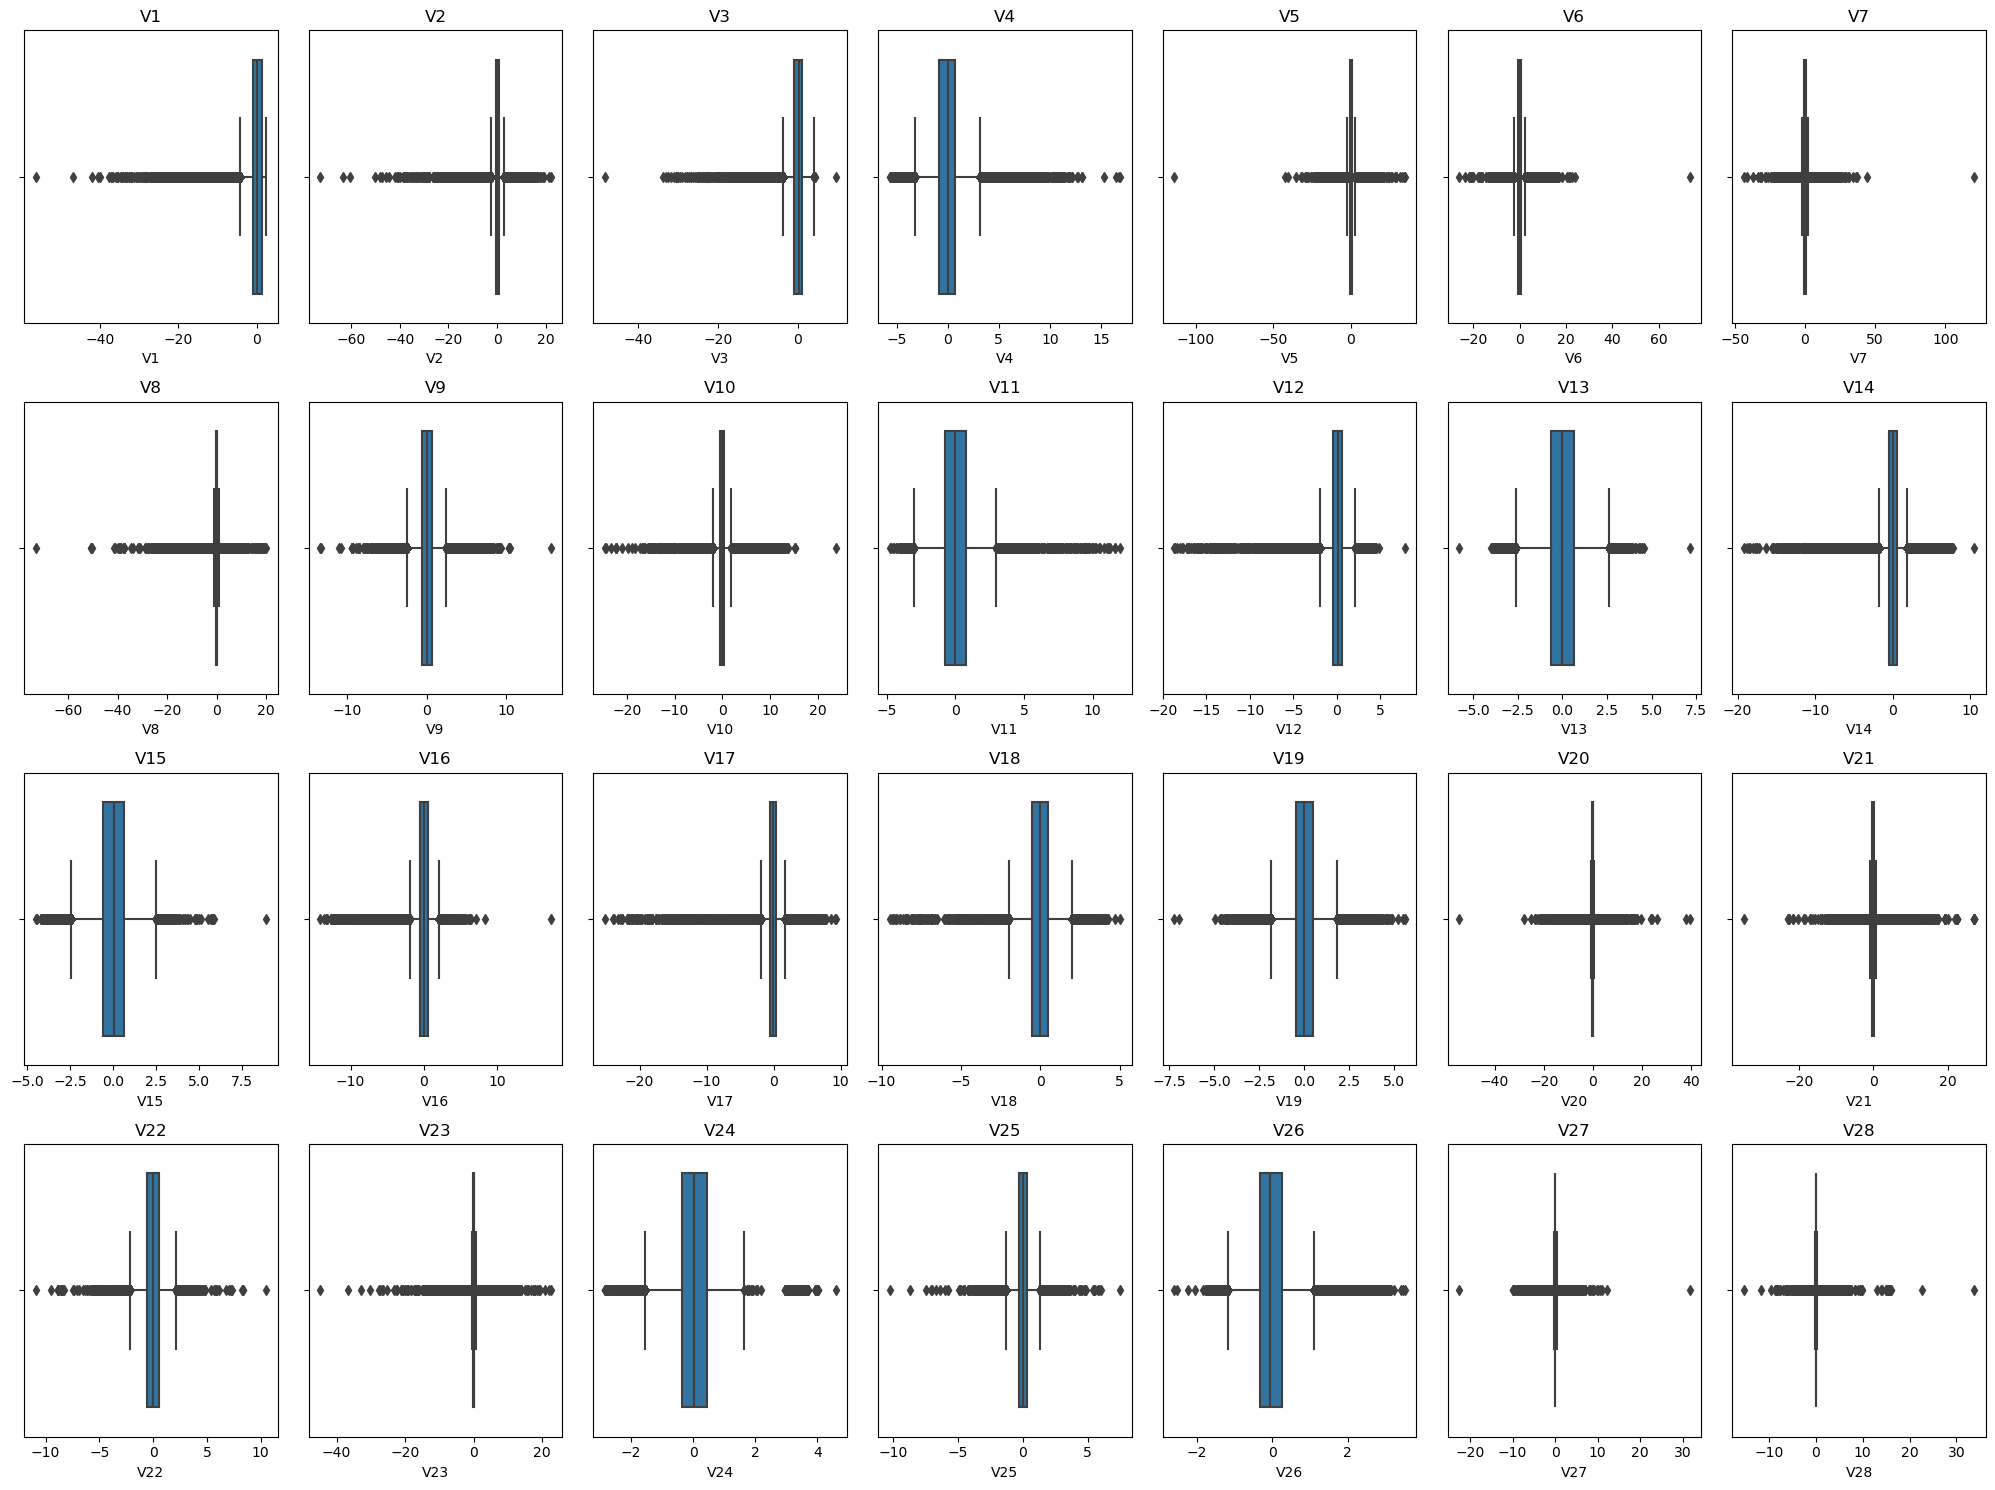

In [8]:
## Create a 4x7 grid of subplots for 28 features (excluding Time, Amount and Class)
fig, axes = plt.subplots(4, 7, figsize = (20, 15))
axes = axes.flatten()  # convert 2D array into 1D array for easier iteration

## List of 28 features to plot
features = [col for col in creditcard.columns if col not in ['Time', 'Amount', 'Class']]

## Plot the distribution of 28 features
for i, ax in enumerate(axes):
    if i < len(features):
        sns.boxplot(x = creditcard[features[i]], ax = ax)
        ax.set_title(features[i])
    else:
        ax.axis('off')  # hide unused subplots

## Show plots
plt.tight_layout()
plt.show()

### b. Plot Time & Amount features

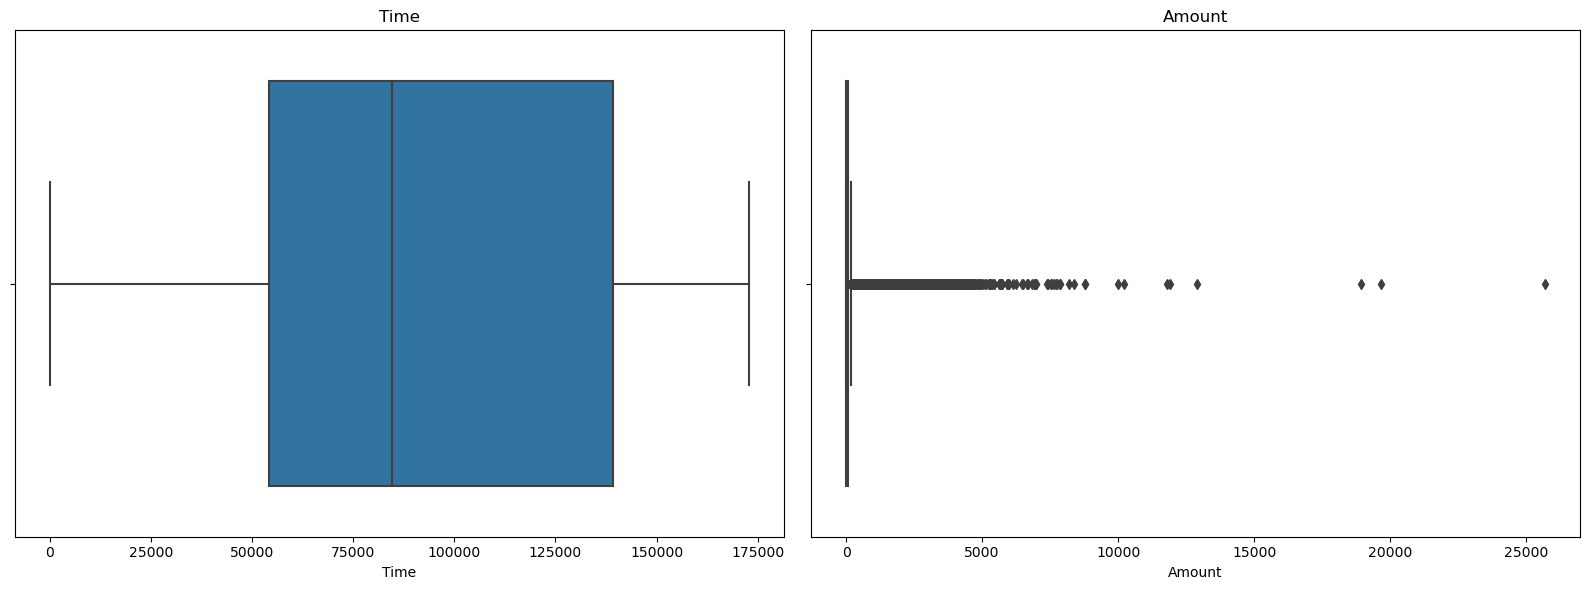

In [10]:
## Create a 1x2 grid of subplots for Time and Amount
fig, axes = plt.subplots(1, 2, figsize = (16, 6))

## Plot Time feature
sns.boxplot(x = creditcard['Time'], ax = axes[0])
axes[0].set_title('Time')

## Plot Amount feature
sns.boxplot(x = creditcard['Amount'], ax = axes[1])
axes[1].set_title('Amount')

## Show plots
plt.tight_layout()
plt.show()

## 2.2. Imabalance ratio

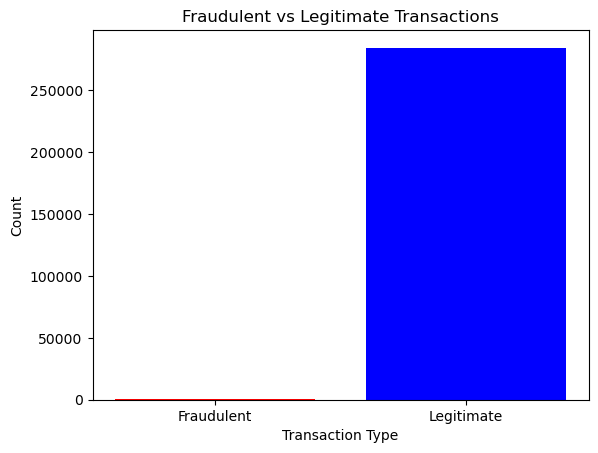

Fraud-to-non-fraud ratio = 0.17%


In [12]:
## Extract fraud and non-fraud count
fraud_count = np.sum(creditcard['Class'] == 1)
legit_count = np.sum(creditcard['Class'] == 0)

## Data preparation for plotting
trans_types = ['Fraudulent', 'Legitimate']
counts = [fraud_count, legit_count]

## Visualisation
plt.bar(trans_types, counts, color = ['red', 'blue'])
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Fraudulent vs Legitimate Transactions')
plt.show()

## Imbalance ratio calculation
imbalance = fraud_count / legit_count * 100
print('Fraud-to-non-fraud ratio = %.2f%%' % imbalance)

## 2.3. Multicollinearity

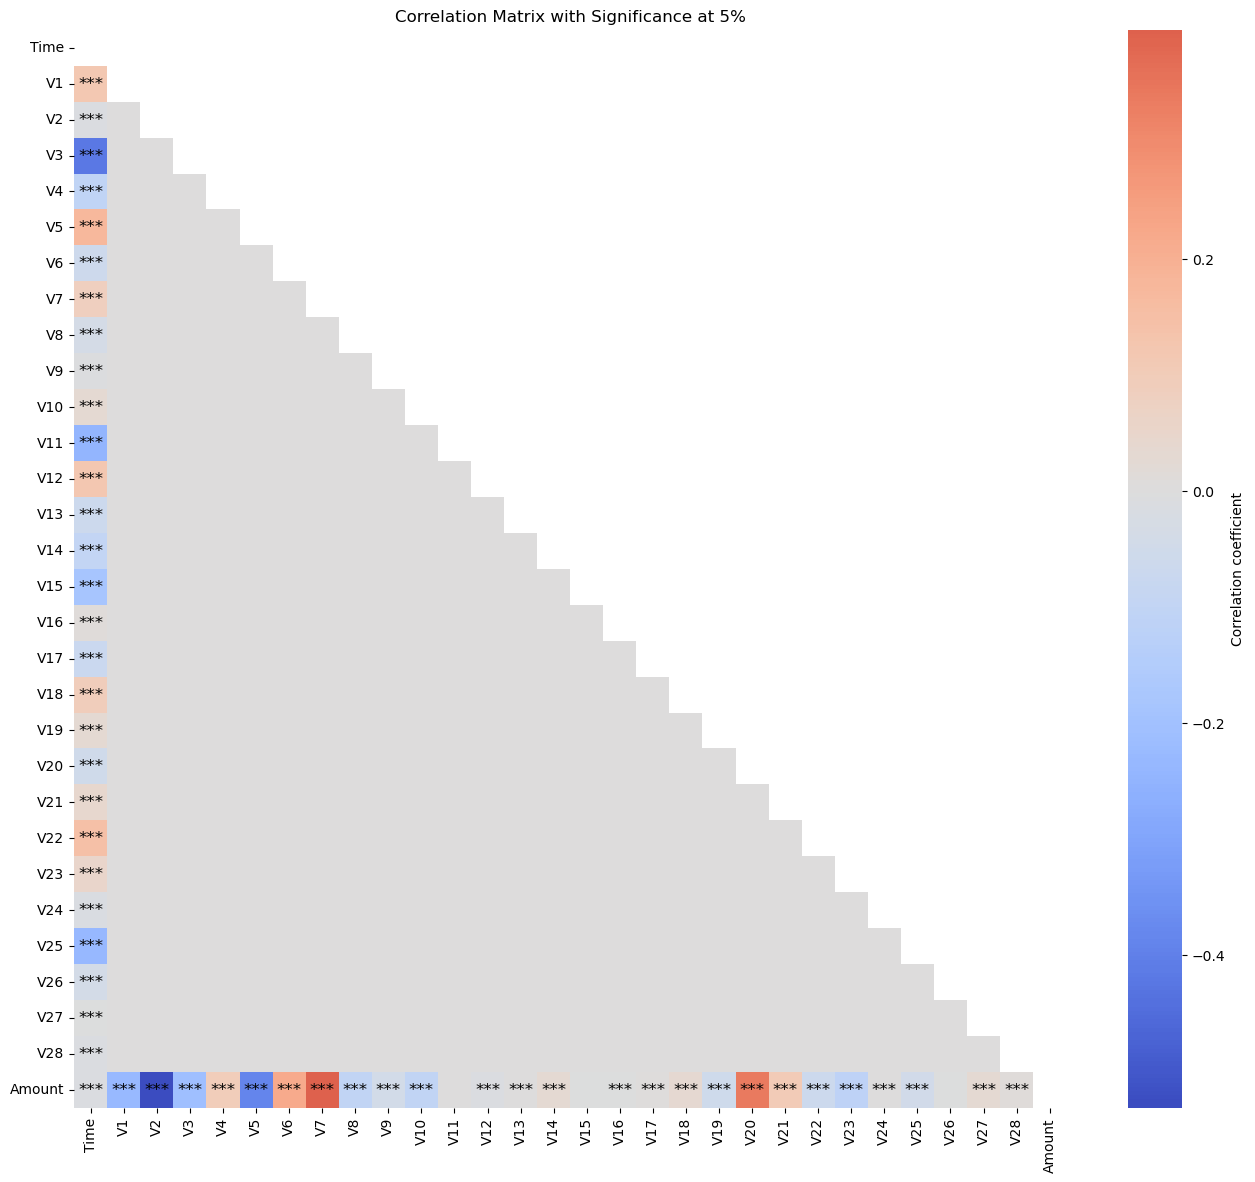

In [14]:
## Exclude Class feature
features = creditcard.drop(columns = ['Class'])

## Correlation coefficient matrix
corr_mat = features.corr()

## P-values calculation
# initialise p-value matrix
p_val = pd.DataFrame(np.zeros((features.shape[1], features.shape[1])),
                     columns = features.columns, index = features.columns)
# calculate p-values
for row in features.columns:
    for col in features.columns:
        if row != col:
            p_val.loc[row, col] = pearsonr(features[row], features[col])[1]
        else:
            p_val.loc[row, col] = np.nan

## Hide upper triangle for cleaner visualisation
mask = np.triu(np.ones_like(corr_mat, dtype = bool))

## Heatmap
plt.figure(figsize = (16, 14))
sns.heatmap(corr_mat, annot = False, fmt = ".2f", mask = mask, cmap = 'coolwarm',
            center = 0, cbar_kws = {'label': 'Correlation coefficient'})

## Add *** for significant p-values (p < 0.05) in lower triangle
for i in range(len(corr_mat.columns)):
    for j in range(i):
        if p_val.iloc[i, j] < 0.05:
            plt.text(j+0.5, i+0.5, '***', ha = 'center', va = 'center',
                     color = 'black', fontsize = 12)

## Map visualisation
plt.title('Correlation Matrix with Significance at 5%')
plt.show()

## 2.4. Time distribution

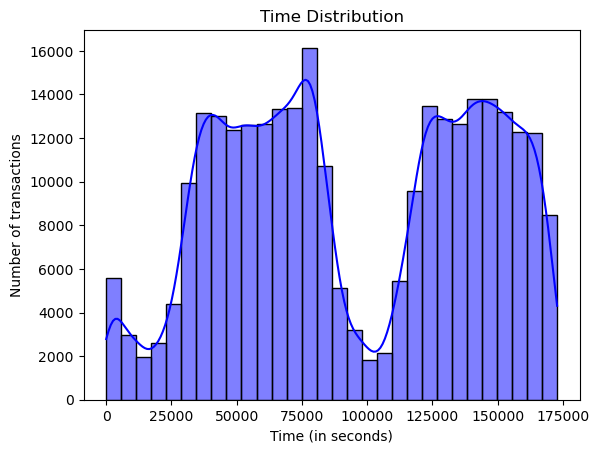

In [16]:
sns.histplot(creditcard['Time'], bins = 30, kde = True,
             color = 'blue', edgecolor = 'black', stat = 'count')
plt.xlabel('Time (in seconds)')
plt.ylabel('Number of transactions')
plt.title('Time Distribution')
plt.show()

## 2.5. Distribution of Time based on Class

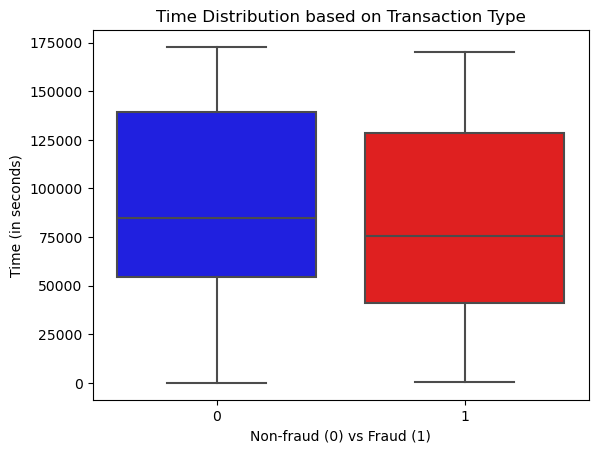

In [18]:
sns.boxplot(x = 'Class', y = 'Time', data = creditcard, palette = ['blue', 'red'])
plt.title('Time Distribution based on Transaction Type')
plt.xlabel('Non-fraud (0) vs Fraud (1)')
plt.ylabel('Time (in seconds)')
plt.show()

## 2.6. Amount distribution

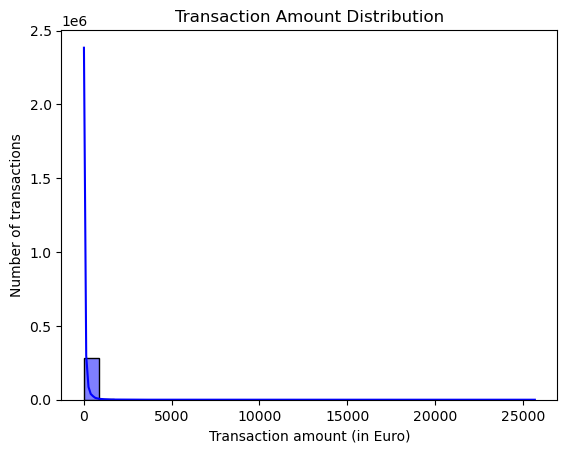

In [20]:
sns.histplot(creditcard['Amount'], bins = 30, kde = True, color = 'blue', edgecolor = 'black', stat = 'count')
plt.xlabel('Transaction amount (in Euro)')
plt.ylabel('Number of transactions')
plt.title('Transaction Amount Distribution')
plt.show()

## 2.7. Distribution of Amount based on Class

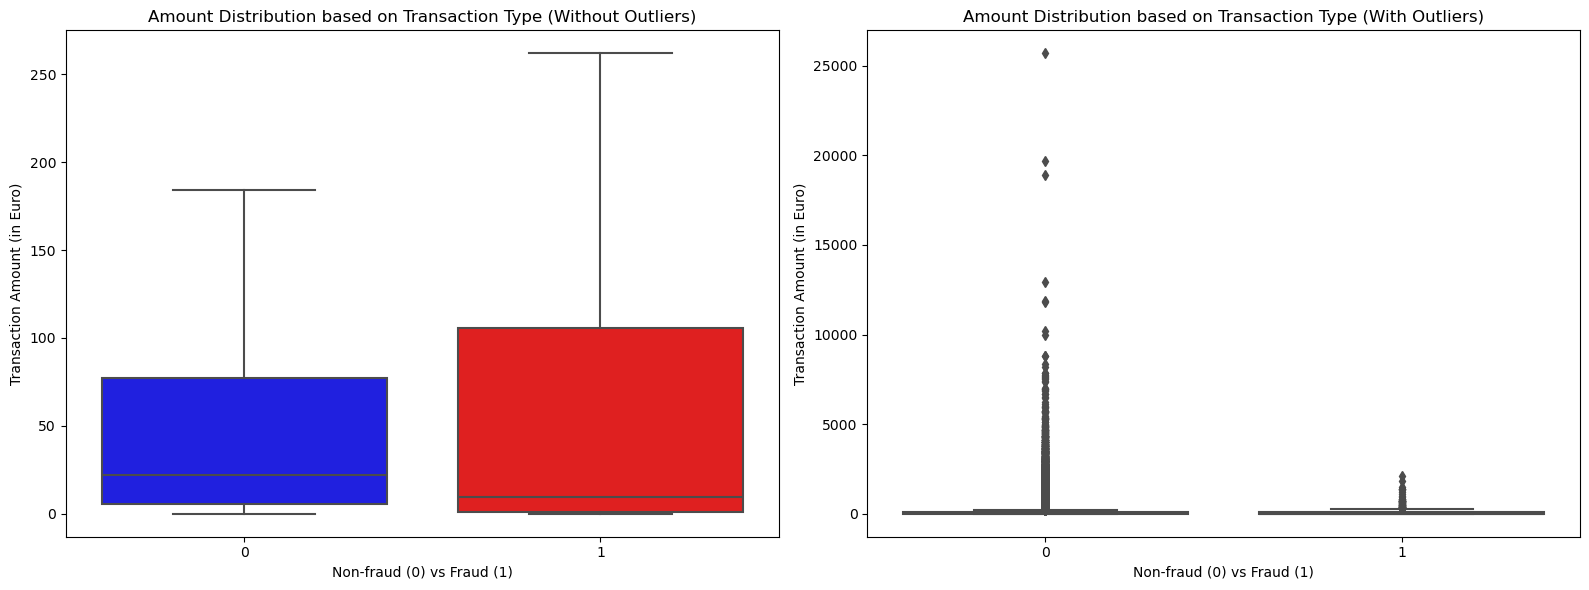

In [22]:
## Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize = (16, 6))

## Without outliers
sns.boxplot(ax = axes[0], x = 'Class', y = 'Amount', data = creditcard, palette = ['blue', 'red'], showfliers = False)
axes[0].set_title('Amount Distribution based on Transaction Type (Without Outliers)')
axes[0].set_xlabel('Non-fraud (0) vs Fraud (1)')
axes[0].set_ylabel('Transaction Amount (in Euro)')

## With outliers
sns.boxplot(ax = axes[1], x = 'Class', y = 'Amount', data = creditcard, palette = ['blue', 'red'])
axes[1].set_title('Amount Distribution based on Transaction Type (With Outliers)')
axes[1].set_xlabel('Non-fraud (0) vs Fraud (1)')
axes[1].set_ylabel('Transaction Amount (in Euro)')

## Show plots
plt.tight_layout()
plt.show()

# 3. Fraud detection models
## 3.1. Variables extraction

In [24]:
X = creditcard.drop('Class', axis = 1)
y = creditcard['Class']

## 3.2. Assumptions checking
To check for independence of observations, assumption for Random Forest, XGBoost, and Extra-Trees.
### a. Durbin-Watson test
Results of Durbin-Watson test:
* 0 to < 2: positive autocorrelation
* Around 2: no autocorrelation
* \> 2 to 4: negative autocorrelation

In [26]:
import statsmodels.api as sm                           # for OLS regression
from statsmodels.stats.stattools import durbin_watson  # for Durbin-Watson test

In [27]:
## Fit multiple linear regression model
x = sm.add_constant(X)      # add constant term to predictor
linear = sm.OLS(y, x).fit()

## Durbin-Watson test
dw_stat = durbin_watson(linear.resid)
print('Durbin-Watson statistic = %.2f' % dw_stat)

Durbin-Watson statistic = 1.97


Durbin-Watson statistic near 2 indicates little or no autocorrelation in the residuals. Therefore, the assumption of significance of observations is satisfied.

### b. Residuals over Time plot

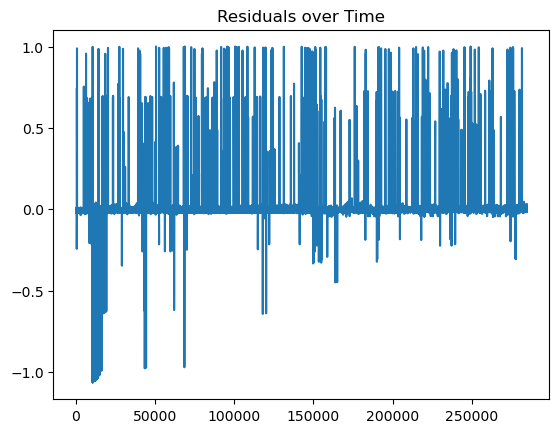

In [30]:
plt.plot(linear.resid)
plt.title('Residuals over Time')
plt.show()

The residuals distribute around zero line with no specific pattern, indicates no trend over time.

### c. Autocorrelation plot

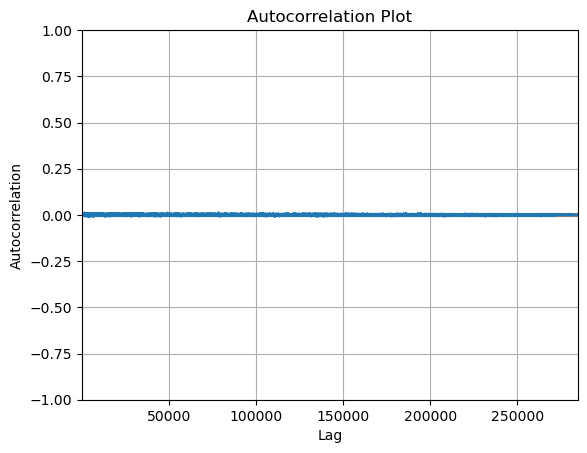

In [33]:
pd.plotting.autocorrelation_plot(linear.resid)
plt.title('Autocorrelation Plot')
plt.show()

The plot shows no positive or negative autocorrelation for all lags.

## 3.3. Train-test split

In [36]:
from sklearn.model_selection import train_test_split  # for splitting data

In [37]:
## Train-test split with ratio 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 112)

## 3.4. Data normalisation

In [39]:
from sklearn.preprocessing import StandardScaler  # for z-score standardisation

In [40]:
## Fit scaler on training data
scaler = StandardScaler()
scaler.fit(X_train)

## Standardise both training and testing sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Transform data from array back to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X.columns)

## 3.5. Model 1: Tomek link removal + Random Forest

### a. Tomek link removal
#### Resample dataset

In [43]:
from imblearn.under_sampling import TomekLinks  # for Tomek link removal

In [44]:
## Create TomekLinks object
tomeklink = TomekLinks(sampling_strategy = 'majority')  # remove only majority class

## Resample the dataset
X_res, y_res = tomeklink.fit_resample(X_train_scaled, y_train)

#### Dataset visualisation - before and after removal

In [46]:
from collections import Counter        # for counting number of elements
from sklearn.decomposition import PCA  # for reducing data dimensions

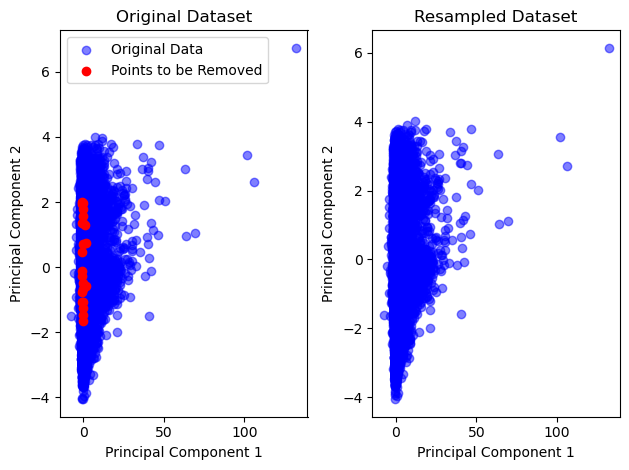

Original dataset shape: Counter({0: 227448, 1: 397})
Resampled dataset shape: Counter({0: 227426, 1: 397})


In [47]:
## Original dataset visualisation
# perform PCA for visualization purpose
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_scaled)
# determine which data points to be removed
remove_index = np.setdiff1d(np.arange(len(X_train_scaled)), tomeklink.sample_indices_)
# create scatter plot for the original dataset
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], color = 'blue', alpha = 0.5, label = 'Original Data')
plt.scatter(X_train_pca[remove_index, 0], X_train_pca[remove_index, 1], color = 'red', label = 'Points to be Removed')
plt.title('Original Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

## Resampled dataset visualisation
# perform PCA for visualization purpose
X_res_pca = pca.transform(X_res)
# create scatter plot for the resampled dataset
plt.subplot(1, 2, 2)
plt.scatter(X_res_pca[:, 0], X_res_pca[:, 1], color = 'blue', alpha = 0.5)
plt.title('Resampled Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

## Show plots
plt.tight_layout()
plt.show()

## Class distribution
print('Original dataset shape:', Counter(y_train))  # original dataset
print('Resampled dataset shape:', Counter(y_res))   # resampled dataset

### b. Random Forest
#### Cross validation to find optimal model

In [49]:
from sklearn.ensemble import RandomForestClassifier                # for Random Forest model
from sklearn.model_selection import StratifiedKFold, GridSearchCV  # for performing cross validation
from sklearn.metrics import make_scorer, average_precision_score   # for computing AUPRC score

In [50]:
## Define model
rand_forest = RandomForestClassifier(class_weight = 'balanced', random_state = 112)

## Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': 2**np.array(range(1, 11), dtype = 'int'),
    'min_samples_leaf': [1, 3, 5]
}

## Ensure each fold has similar class distribution
cv = StratifiedKFold(n_splits = 3)

## Define custom scoring for AUPRC
auprc_scorer = make_scorer(average_precision_score, needs_proba = True)

## Create GridSearchCV object
grid_search = GridSearchCV(rand_forest, param_grid, cv = cv, scoring = auprc_scorer, n_jobs = -1)

## Perform grid search
grid_search.fit(X_res, y_res)

/Users/neonasre/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/neonasre/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/neonasre/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/neonasre/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=112),
             n_jobs=-1,
             param_grid={'max_depth': array([   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024]),
                         'min_samples_leaf': [1, 3, 5]},
             scoring=make_scorer(average_precision_score, needs_proba=True))

In [51]:
## Print best score and corresponding parameters
print('Best AUPRC score = %.2f' % grid_search.best_score_, 'achieved at the following parameters:')
print(grid_search.best_params_)

Best AUPRC score = 0.84 achieved at the following parameters:
{'max_depth': 64, 'min_samples_leaf': 3}


#### Model Training

In [53]:
best_rand_forest = grid_search.best_estimator_  # model with best parameters
best_rand_forest.fit(X_res, y_res)

RandomForestClassifier(class_weight='balanced', max_depth=64,
                       min_samples_leaf=3, random_state=112)

#### Model testing

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, average_precision_score  # confusion matrix & AUPRC score

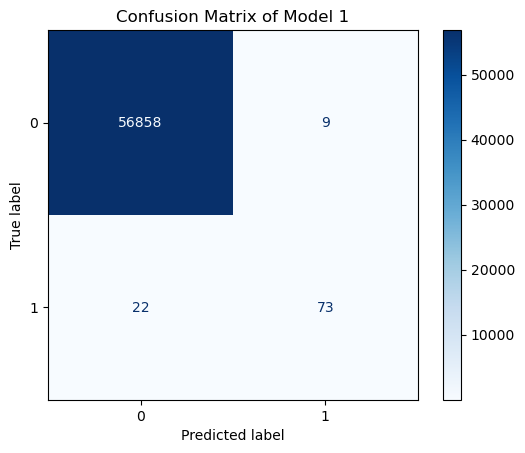

Fraudulent accuracy = 76.84%
Genuine accuracy = 99.98%
AUPRC score = 0.85


In [56]:
## Prediction
y_pred = best_rand_forest.predict(X_test_scaled)

## Confusion matrix
con_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat)
disp.plot(cmap = plt.cm.Blues)
plt.title('Confusion Matrix of Model 1')
plt.show()

## Categorical accuracy
fraud_acc_model1 = con_mat[1, 1] / np.sum(con_mat, axis = 1)[1] * 100
legit_acc_model1 = con_mat[0, 0] / np.sum(con_mat, axis = 1)[0] * 100
print('Fraudulent accuracy = %.2f%%' % fraud_acc_model1)
print('Genuine accuracy = %.2f%%' % legit_acc_model1)

## AUPRC score
y_pred_prob_model1 = best_rand_forest.predict_proba(X_test_scaled)[:, 1]  # probability for test set
auprc_model1 = average_precision_score(y_test, y_pred_prob_model1)
print('AUPRC score = %.2f' % auprc_model1)

## 3.6. Model 2: K-means + XGBoost

### a. K-means
#### Elbow method to find a range of possible K

In [59]:
from sklearn.cluster import KMeans  # for K-means

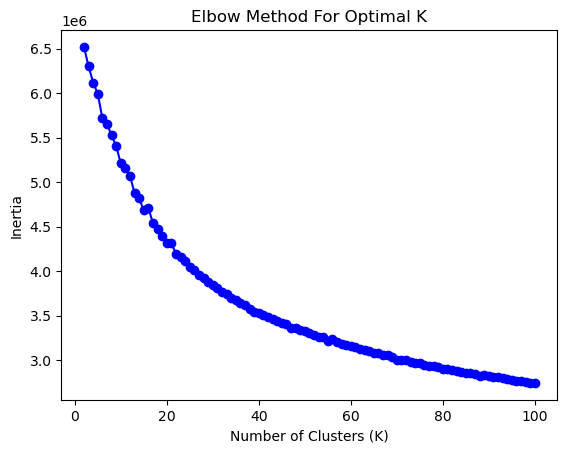

In [60]:
## Range of K values
k_val = range(2, 101)

## Initialise list of inertias
inertias = []

## Compute inertia for different values of K
for k in k_val:
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 112)
    kmeans.fit(X_train_scaled)
    inertias.append(kmeans.inertia_)

## Elbow graph
plt.plot(k_val, inertias, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

Optimal range of K is between 20 and 40.

#### Silhouette score to find best K

In [63]:
from sklearn.metrics import silhouette_score  # for computing Silhouette score

Silhouette score = 0.08 at K = 20
Silhouette score = 0.08 at K = 22
Silhouette score = 0.08 at K = 24
Silhouette score = 0.07 at K = 26
Silhouette score = 0.07 at K = 28
Silhouette score = 0.09 at K = 30
Silhouette score = 0.08 at K = 32
Silhouette score = 0.08 at K = 34
Silhouette score = 0.08 at K = 36
Silhouette score = 0.08 at K = 38
Silhouette score = 0.08 at K = 40


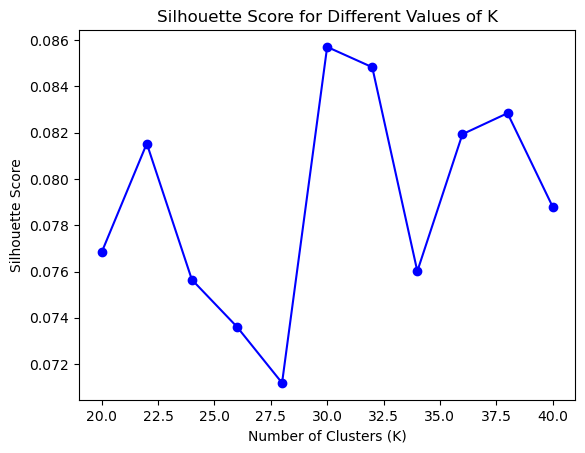

Best K value = 30 achieved at the highest Silhouette score of 0.09


In [64]:
## Range of K values
k_val = range(20, 41, 2)

## Initialise list of silhouette scores
sil_scores = []

## Compute silhouette scores for different values of K
for k in k_val:
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 112)
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    sil_scores.append(score)
    print('Silhouette score = %.2f' % score, 'at K =', k)

## Silhouette scores plot
plt.plot(k_val, sil_scores, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of K')
plt.show()

## Best K value
best_k = k_val[np.argmax(sil_scores)]
print('Best K value =', best_k, 'achieved at the highest Silhouette score of %.2f' % max(sil_scores))

### b. Clustering & XGBoost
#### Cross-validation to find optimal model

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin  # for building K-means transformation function
from xgboost import XGBClassifier                         # for XGBoost
from sklearn.pipeline import Pipeline                     # for stacking multiple functions together

In [67]:
## Negative-to-positive class ratio
neg_pos_ratio = np.sum(y_train == 0) / np.sum(y_train == 1)

## Define function to integrate K-means clustering
class KMeansTransformer(BaseEstimator, TransformerMixin):
    # define parameters
    def __init__(self, n_clusters, n_init, random_state):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.random_state = random_state
    # define and fit K-means model to cluster
    def fit(self, X, y = None):
        self.kmeans = KMeans(n_clusters = self.n_clusters, n_init = self.n_init, random_state = self.random_state)
        self.kmeans.fit(X)
        return self
    # integrate clusters
    def transform(self, X, y = None):
        clusters = self.kmeans.predict(X)
        X_new = pd.DataFrame(X).copy()
        X_new['cluster'] = clusters
        return X_new

## Define pipeline
pipeline = Pipeline([
    ("kmeans", KMeansTransformer(n_clusters = best_k, n_init = 10, random_state = 112)),
    ("xgb", XGBClassifier(scale_pos_weight = neg_pos_ratio, random_state = 112))
])

## Define parameter grid for GridSearchCV
param_grid = {
    'xgb__max_depth': 2**np.array(range(1, 11), dtype = 'int'),
    'xgb__gamma': [0, 0.1],
    'xgb__reg_alpha': [0, 0.1],
    'xgb__reg_lambda': [0, 0.5]
}

## Ensure each fold has similar class distribution
cv = StratifiedKFold(n_splits = 3)

## Define custom scoring for AUPRC
auprc_scorer = make_scorer(average_precision_score, needs_proba = True)

## Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv = cv, scoring = auprc_scorer, n_jobs = -1)

## Perform grid search
grid_search.fit(X_train_scaled, y_train)

/Users/neonasre/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/neonasre/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/neonasre/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/neonasre/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('kmeans',
                                        KMeansTransformer(n_clusters=30,
                                                          n_init=10,
                                                          random_state=112)),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=112, ...))]),
             n_jobs=-1,
             param_grid={'xgb__gamma': [0, 0.1],
                         'xgb__max_depth': array([   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024]),
                         'xgb__reg_alpha': [0, 0.1],
                         'xgb__reg_lambda': [0, 0.5]},
             scoring=make_scorer(average_precision_score, needs_proba=True))

In [68]:
## Print best score and corresponding parameters
print('Best AUPRC score = %.2f' % grid_search.best_score_, 'achieved at the following parameters:')
print(grid_search.best_params_)

Best AUPRC score = 0.85 achieved at the following parameters:
{'xgb__gamma': 0, 'xgb__max_depth': 8, 'xgb__reg_alpha': 0.1, 'xgb__reg_lambda': 0}


#### Model training

In [70]:
best_pipeline = grid_search.best_estimator_  # model with best parameters
best_pipeline.fit(X_train_scaled, y_train)

Pipeline(steps=[('kmeans',
                 KMeansTransformer(n_clusters=30, n_init=10, random_state=112)),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=112, ...))])

#### Model testing

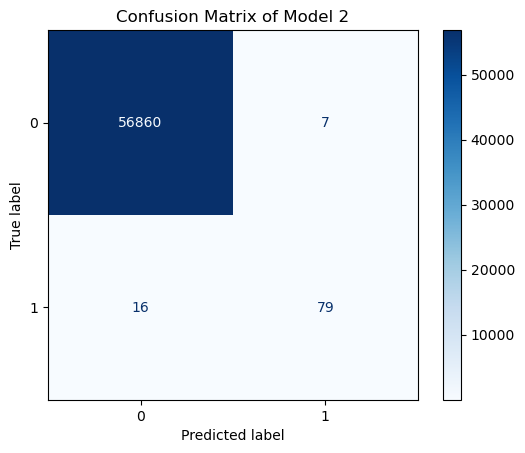

Fraudulent accuracy = 83.16%
Genuine accuracy = 99.99%
AUPRC score = 0.86


In [72]:
## Prediction
y_pred = best_pipeline.predict(X_test_scaled)

## Confusion matrix
con_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat)
disp.plot(cmap = plt.cm.Blues)
plt.title('Confusion Matrix of Model 2')
plt.show()

## Categorical accuracy
fraud_acc_model2 = con_mat[1, 1] / np.sum(con_mat, axis = 1)[1] * 100
legit_acc_model2 = con_mat[0, 0] / np.sum(con_mat, axis = 1)[0] * 100
print('Fraudulent accuracy = %.2f%%' % fraud_acc_model2)
print('Genuine accuracy = %.2f%%' % legit_acc_model2)

## AUPRC score
y_pred_prob_model2 = best_pipeline.predict_proba(X_test_scaled)[:, 1]  # probability for test set
auprc_model2 = average_precision_score(y_test, y_pred_prob_model2)
print('AUPRC score = %.2f' % auprc_model2)

## 3.7. Model 3: Extra-Trees + DNN
### a. Extra-Trees
#### Cross validation to find optimal model

In [74]:
from sklearn.ensemble import ExtraTreesClassifier  # for Extra-Trees

In [75]:
## Define model
extra_trees = ExtraTreesClassifier(class_weight = 'balanced', random_state = 112)

## Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': 2**np.array(range(1, 11), dtype = 'int'),
    'min_samples_leaf': [1, 3, 5]
}

## Ensure each fold has similar class distribution
cv = StratifiedKFold(n_splits = 3)

## Define custom scoring for AUPRC
auprc_scorer = make_scorer(average_precision_score, needs_proba = True)

## Create GridSearchCV object
grid_search = GridSearchCV(extra_trees, param_grid, cv = cv, scoring = auprc_scorer, n_jobs = -1)

## Perform grid search
grid_search.fit(X_train_scaled, y_train)

/Users/neonasre/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/neonasre/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/neonasre/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/neonasre/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=ExtraTreesClassifier(class_weight='balanced',
                                            random_state=112),
             n_jobs=-1,
             param_grid={'max_depth': array([   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024]),
                         'min_samples_leaf': [1, 3, 5]},
             scoring=make_scorer(average_precision_score, needs_proba=True))

In [76]:
## Print best score and corresponding parameters
print('Best AUPRC score = %.2f' % grid_search.best_score_, 'achieved at the following parameters:')
print(grid_search.best_params_)

Best AUPRC score = 0.85 achieved at the following parameters:
{'max_depth': 64, 'min_samples_leaf': 1}


#### Model training

In [78]:
best_extra_trees = grid_search.best_estimator_  # model with best parameters
best_extra_trees.fit(X_train_scaled, y_train)

ExtraTreesClassifier(class_weight='balanced', max_depth=64, random_state=112)

#### Visualise feature importances

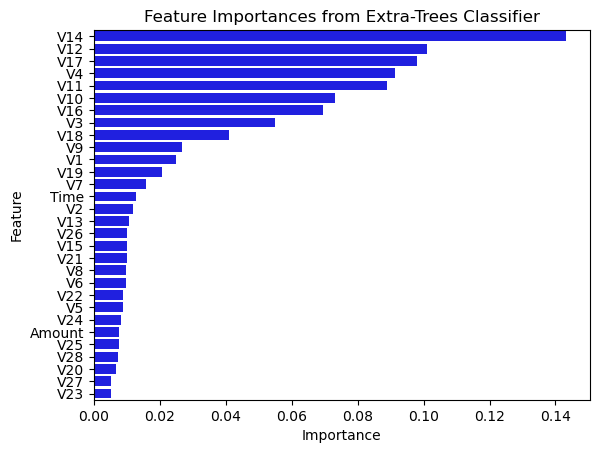

In [80]:
## Extract feature importances
feature_importances = best_extra_trees.feature_importances_

## Create a dataframe for visualisation
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

## Sort dataframe by importance
importances_df = importances_df.sort_values(by = 'Importance', ascending = False)

## Plot feature importances
sns.barplot(x = 'Importance', y = 'Feature', data = importances_df, color = 'blue')
plt.title('Feature Importances from Extra-Trees Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### Select feature importances

In [82]:
## Select top 15 important features
importances_index = np.argsort(feature_importances)[-15:]
X_train_importances = X_train_scaled.iloc[:, importances_index]
X_test_importances = X_test_scaled.iloc[:, importances_index]

### b. DNN
#### Transform data into tensors

In [84]:
import tensorflow as tf  # for tensor creation & DNN construction

In [85]:
X_train_tensor = tf.constant(X_train_importances, dtype = tf.float32)
X_test_tensor = tf.constant(X_test_importances, dtype = tf.float32)
y_train_tensor = tf.constant(y_train.values, dtype = tf.float32)
y_test_tensor = tf.constant(y_test.values, dtype = tf.float32)

#### Define model

In [87]:
import random  # for setting seed

In [88]:
## Define custom loss function combining categorical loss and MAE
def custom_loss(y_true, y_pred):
    # calculate categorical loss
    categorical_loss = tf.keras.losses.BinaryCrossentropy()(y_true, y_pred)
    # calculate MAE loss
    mae_loss = tf.keras.losses.MeanAbsoluteError()(y_true, y_pred)
    # combine losses
    combined_loss = categorical_loss + mae_loss
    return combined_loss

## For reproducibility
def set_seed(seed = 112):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)

## Define DNN model
def DNN(X_train, y_train):
    # set seed
    set_seed()
    # build structure
    model = tf.keras.Sequential([
        # layer 1
        tf.keras.layers.Dense(128, input_shape = (X_train.shape[1],), activation = 'relu'),
        # layer 2
        tf.keras.layers.Dense(64, activation = 'relu'),
        # layer 3
        tf.keras.layers.Dense(32, activation = 'relu'),
        # layer 4
        tf.keras.layers.Dense(16, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')  # transform output into values between 0 and 1
    ])
    # compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001)
    model.compile(optimizer = optimizer, loss = custom_loss, metrics = [tf.keras.metrics.AUC(name = 'auprc', curve = 'PR')])
    # early stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)
    # learning rate scheduler
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 5, min_lr = 1e-6)
    # calculate class weights
    class_weight = {0: 1, 1: np.sum(y_train == 0) / np.sum(y_train == 1)}
    # fit model
    model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_split = 0.1,
              callbacks = [early_stopping, lr_scheduler], class_weight = class_weight)
    return model

#### Model training

In [90]:
## Train model
dnn = DNN(X_train_tensor, y_train_tensor)

## Check predictions range
unique_predictions = np.unique(dnn.predict(X_test_tensor))
print('Number of unique combined predictions:', len(unique_predictions))

## Check if predictions are not all the same
if len(unique_predictions) < 10:
    print('Warning: The model predictions might be collapsing to a single value.')
else:
    print('Model predictions have a reasonable variance.')

Epoch 1/50
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 4s 490us/step - auprc: 0.3913 - loss: 0.7515 - val_auprc: 0.8325 - val_loss: 0.0069 - learning_rate: 1.0000e-04
Epoch 2/50
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 3s 470us/step - auprc: 0.7450 - loss: 0.0545 - val_auprc: 0.8362 - val_loss: 0.0065 - learning_rate: 1.0000e-04
Epoch 3/50
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 3s 475us/step - auprc: 0.7598 - loss: 0.0497 - val_auprc: 0.8407 - val_loss: 0.0063 - learning_rate: 1.0000e-04
Epoch 4/50
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 3s 478us/step - auprc: 0.7704 - loss: 0.0469 - val_auprc: 0.8376 - val_loss: 0.0059 - learning_rate: 1.0000e-04
Epoch 5/50
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 3s 478us/step - auprc: 0.7778 - loss: 0.0444 - val_auprc: 0.8356 - val_loss: 0.0057 - learning_rate: 1.0000e-04
Epoch 6/50
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 3s 473us/step - auprc: 0.7865 - loss: 0.0422 - val_auprc: 0.8393 - val_loss: 0.0056 - learning_rate: 1.0000e-04
Epoch 7/50
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 3s 468us/step - auprc: 0.7909 - lo

#### Model testing

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step


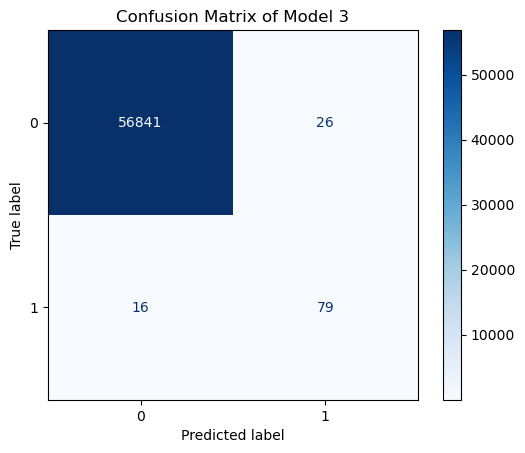

Fraudulent accuracy = 83.16%
Genuine accuracy = 99.95%
AUPRC score = 0.85


In [92]:
## Prediction
y_pred_prob_model3 = dnn.predict(X_test_tensor).reshape(-1)  # ensure it's a row vector
y_pred = (y_pred_prob_model3 >= 0.5).astype(int)             # convert probability into binary classification

## Confusion matrix
con_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat)
disp.plot(cmap = plt.cm.Blues)
plt.title('Confusion Matrix of Model 3')
plt.show()

## Categorical accuracy
fraud_acc_model3 = con_mat[1, 1] / np.sum(con_mat, axis = 1)[1] * 100
legit_acc_model3 = con_mat[0, 0] / np.sum(con_mat, axis = 1)[0] * 100
print('Fraudulent accuracy = %.2f%%' % fraud_acc_model3)
print('Genuine accuracy = %.2f%%' % legit_acc_model3)

## AUPRC score
auprc_model3 = average_precision_score(y_test, y_pred_prob_model3)
print('AUPRC score = %.2f' % auprc_model3)

# 4. Model comparison
## 4.1. Categorical accuracy

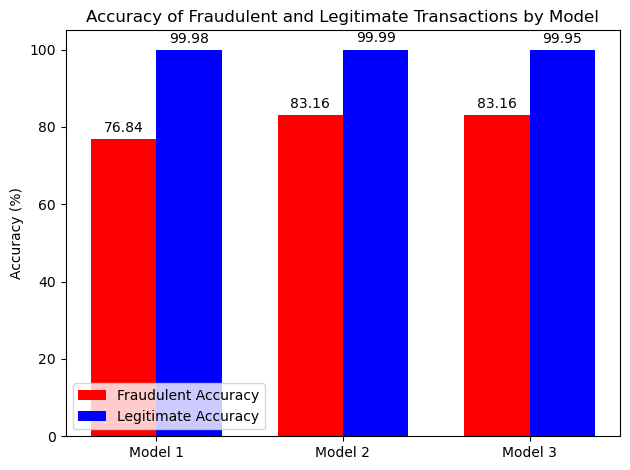

In [94]:
## Prepare plot's features
fraud_accuracies = [fraud_acc_model1, fraud_acc_model2, fraud_acc_model3]
legit_accuracies = [legit_acc_model1, legit_acc_model2, legit_acc_model3]
models = ['Model 1', 'Model 2', 'Model 3']
pos = np.arange(len(models))  # positions for the groups
width = 0.35                  # width of the bars

## Create supblots
fig, ax = plt.subplots()

## Plot the bars
bars1 = ax.bar(pos - width/2, fraud_accuracies, width, color = 'red', label = 'Fraudulent Accuracy')
bars2 = ax.bar(pos + width/2, legit_accuracies, width, color = 'blue', label = 'Legitimate Accuracy')

## Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy of Fraudulent and Legitimate Transactions by Model')
ax.set_xticks(pos)
ax.set_xticklabels(models)
ax.legend(loc = 'lower left')

## Add bar labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('%.2f' % height, xy = (bar.get_x() + bar.get_width() / 2, height),
                    xytext = (0, 3),  # 3 points vertical offset
                    textcoords = "offset points", ha = 'center', va = 'bottom')
add_labels(bars1)
add_labels(bars2)

## Display bar chart
plt.tight_layout()
plt.show()

## 4.2. Precision-recall curves

In [96]:
from sklearn.metrics import precision_recall_curve  # for plotting precision-recall curve

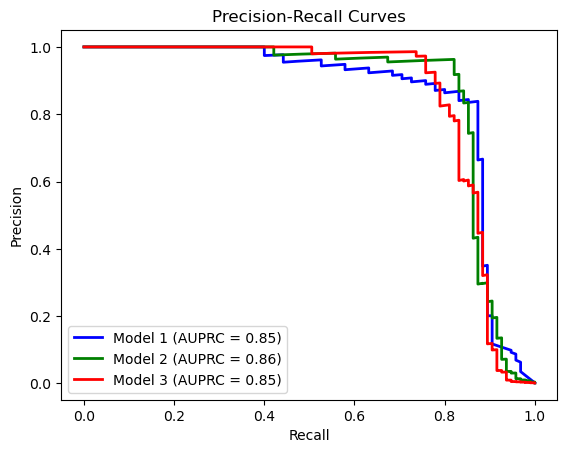

In [97]:
## Prepare plot's features
model_predictions = [y_pred_prob_model1, y_pred_prob_model2, y_pred_prob_model3]
model_labels = ['Model 1', 'Model 2', 'Model 3']
colors = ['blue', 'green', 'red']

## Plot precision-recall curves
for idx, (model_prob, label, color) in enumerate(zip(model_predictions, model_labels, colors)):
    precision, recall, _ = precision_recall_curve(y_test, model_prob)
    auprc = average_precision_score(y_test, model_prob)
    plt.plot(recall, precision, lw = 2, color = color, label = f'{label} (AUPRC = {auprc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()